In [81]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from keras.layers import Dense, Input
from keras.models import Sequential
from keras.utils import plot_model

from sklearn.metrics import accuracy_score, classification_report

In [2]:
PATH = '/content/titanic.csv'

df = pd.read_csv(PATH)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df['Sex'] = [0 if sex == 'male' else 1 for sex in df['Sex']]

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Survival rate analysis

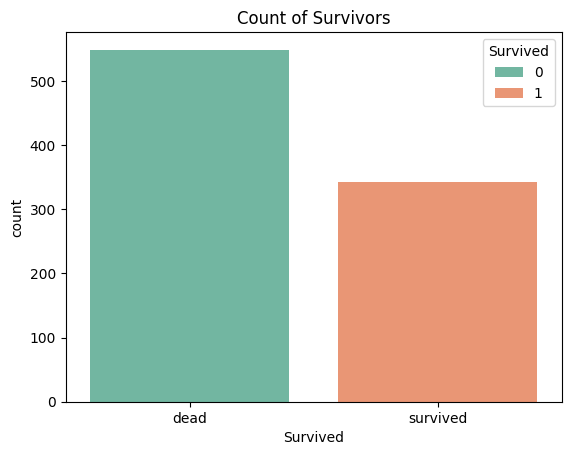

In [5]:
labels = ['dead', 'survived']
sns.countplot(data=df, x=df['Survived'], hue=df.Survived, palette='Set2')
plt.title('Count of Survivors')
plt.xticks(labels=labels, ticks=[0,1])


plt.show()

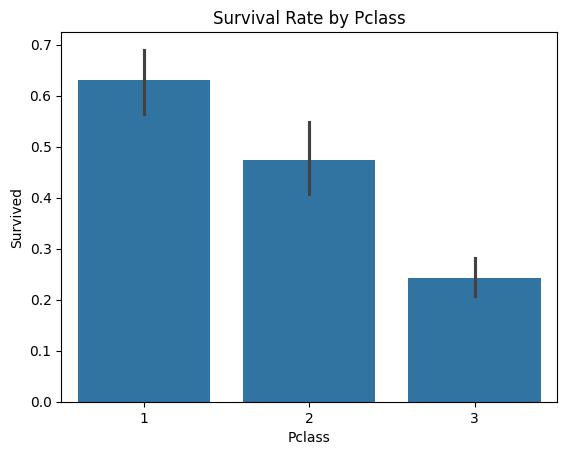

In [6]:
sns.barplot(data=df, x='Pclass', y='Survived', estimator=lambda x: sum(x)/len(x))
plt.title('Survival Rate by Pclass')
plt.show()

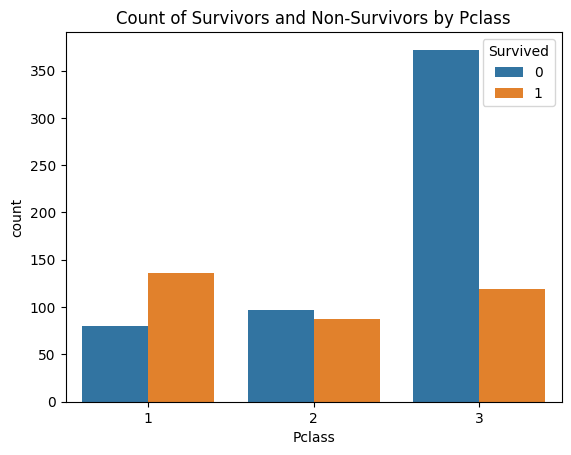

In [7]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Count of Survivors and Non-Survivors by Pclass')
plt.show()

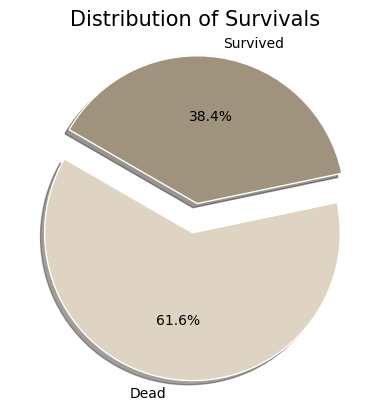

In [8]:
counter = df['Survived'].value_counts()

labels = ['Dead', 'Survived']
colors = ['#DFD3C3', '#A0937D']

plt.pie(x=counter,labels=labels, colors=colors, autopct='%1.1f%%', startangle=150,
        wedgeprops={'edgecolor': 'white'}, shadow=True, explode=[0.1, 0.1])
plt.title('Distribution of Survivals', size=15)

plt.show()

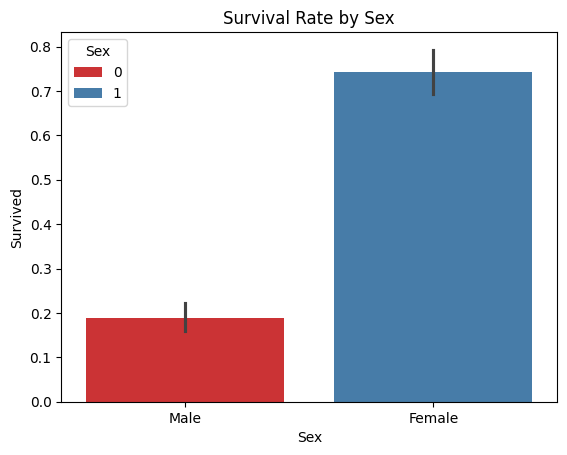

In [9]:
labels=['Male', 'Female']

sns.barplot(data=df, x='Sex', y='Survived', estimator=lambda x: sum(x)/len(x), hue='Sex', palette='Set1')
plt.title('Survival Rate by Sex')
plt.xticks(labels=labels, ticks=[0,1])
plt.show()

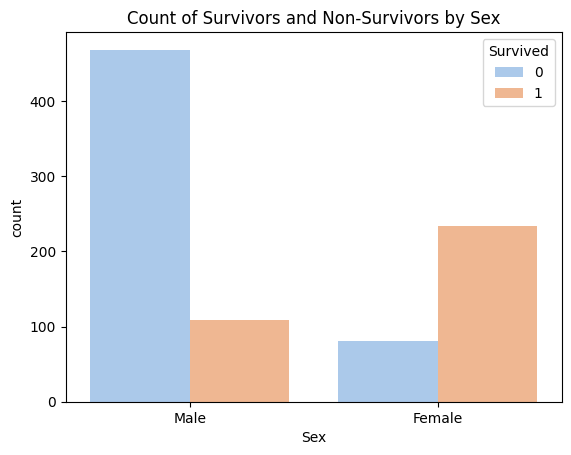

In [10]:
sns.countplot(data=df, x='Sex', hue='Survived', palette='pastel')
plt.title('Count of Survivors and Non-Survivors by Sex')
plt.xticks(labels=['Male', 'Female'], ticks=[0,1])

plt.show()

### Age and Fare analysis

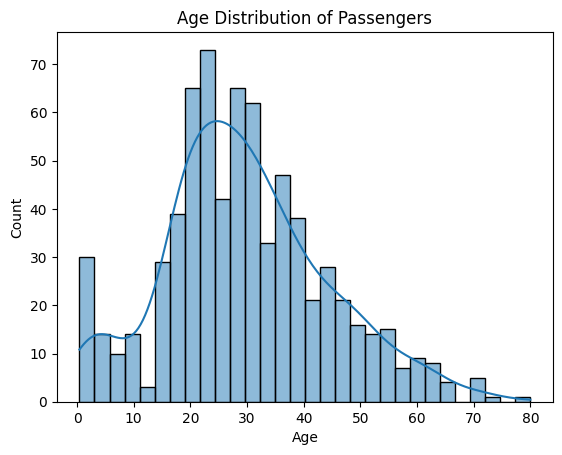

In [11]:
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()

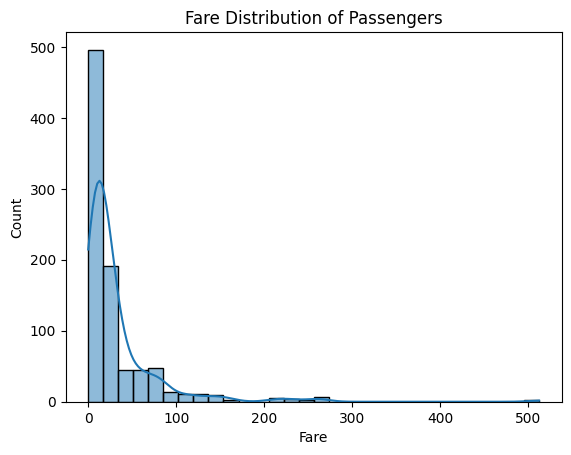

In [12]:
sns.histplot(df['Fare'].dropna(), bins=30, kde=True)
plt.title('Fare Distribution of Passengers')
plt.show()


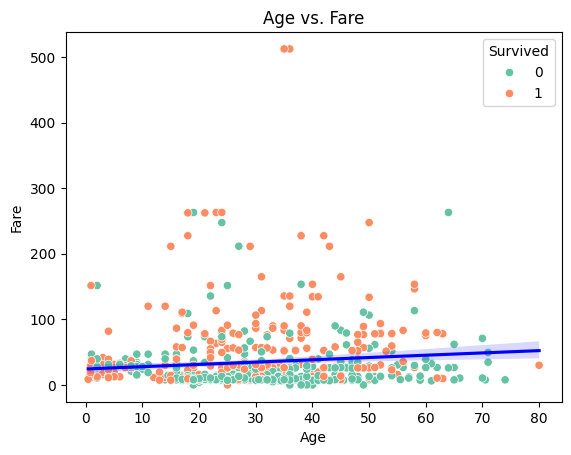

In [13]:
sns.scatterplot(data=df, x=df['Age'], y=df['Fare'], hue=df['Survived'], palette='Set2')
sns.regplot(data=df, x=df['Age'], y=df['Fare'], scatter=False, color='blue')
plt.title('Age vs. Fare')
plt.show()

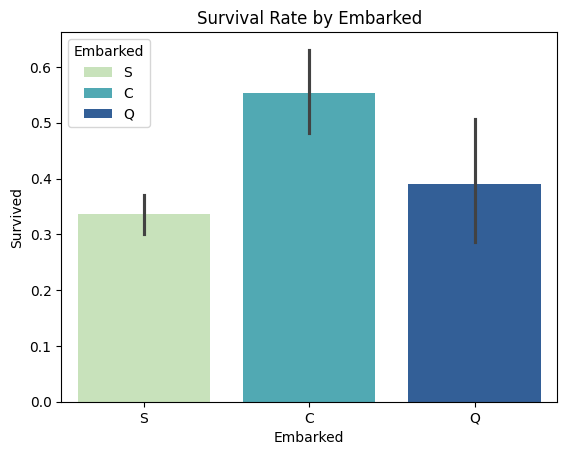

In [14]:
sns.barplot(data=df, x='Embarked', y='Survived', estimator=lambda x: sum(x)/len(x), hue=df['Embarked'], palette='YlGnBu')
plt.title('Survival Rate by Embarked')
plt.show()

In [15]:
counter = df['Embarked'].value_counts()

counter

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

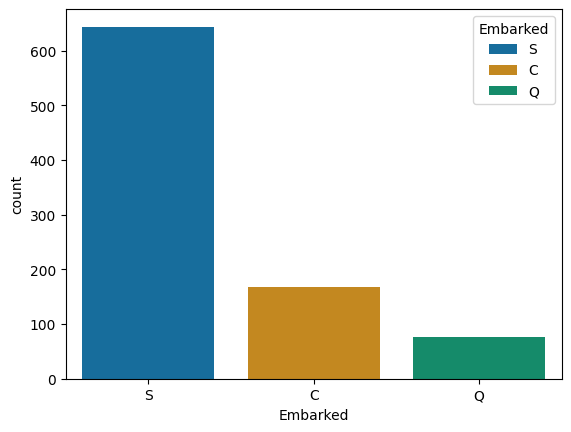

In [16]:
counter = df['Embarked'].value_counts()

sns.countplot(data=df, x='Embarked', hue='Embarked', palette='colorblind')


plt.show()

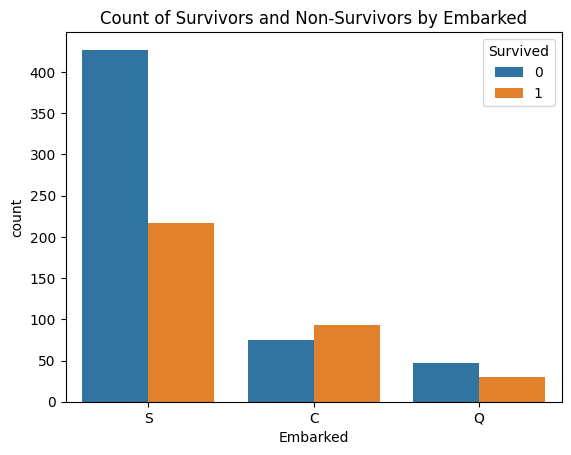

In [17]:
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Count of Survivors and Non-Survivors by Embarked')
plt.show()


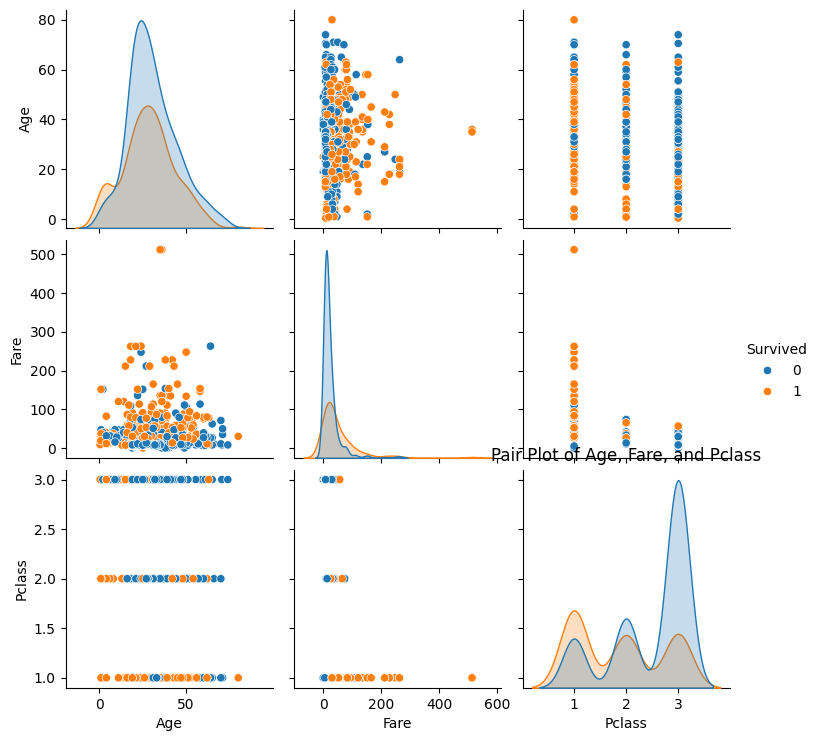

In [18]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']].dropna(), hue='Survived')
plt.title('Pair Plot of Age, Fare, and Pclass')
plt.show()


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [20]:
int_list= [col for col in df.columns if df[col].dtype == 'int64']

int_list

['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch']

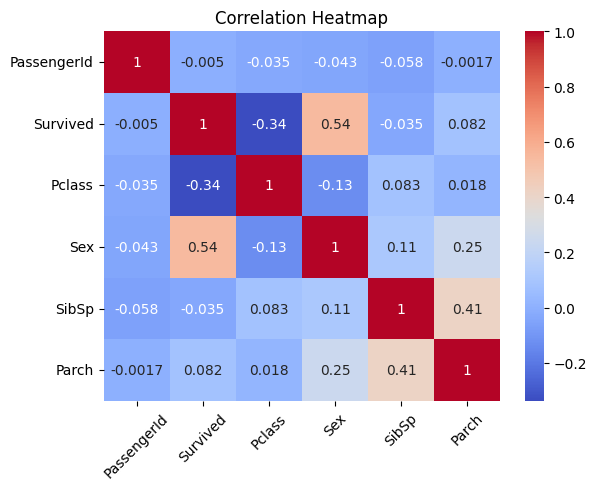

In [21]:
correlation_matrix = df[int_list].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
#plt.savefig('correlation.png', dpi=300, bbox_inches='tight')
plt.show()

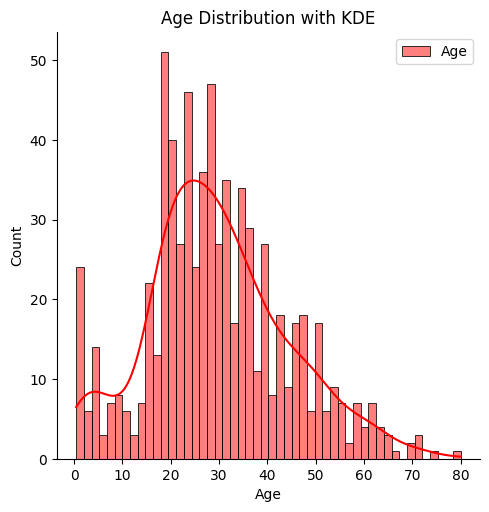

In [22]:
sns.displot(data=df, x='Age', bins=50, color='r', label='Age', kde=True)

plt.title('Age Distribution with KDE')
plt.xlabel('Age')

plt.legend()
plt.show()

<ipython-input-23-c16467981da6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Sex'] == 0]['Age'], kde=True, bins=50, color='g')
<ipython-input-23-c16467981da6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Sex'] == 1]['Age'], kde=True, bins=50, color='r')


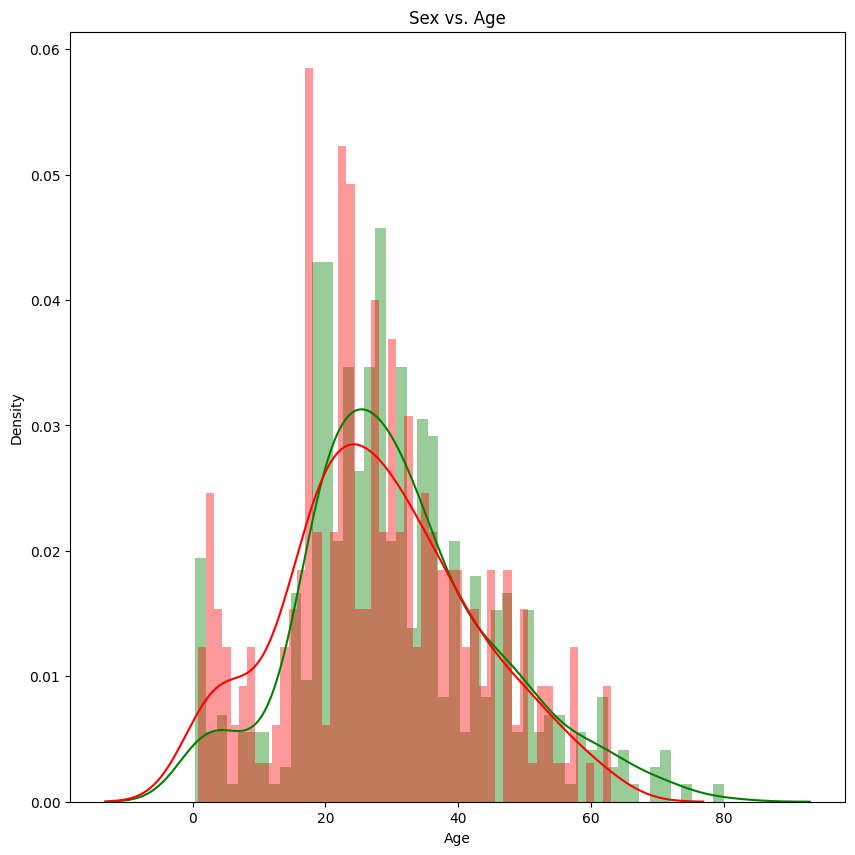

In [23]:
plt.figure(figsize=(10,10))

sns.distplot(df[df['Sex'] == 0]['Age'], kde=True, bins=50, color='g')
sns.distplot(df[df['Sex'] == 1]['Age'], kde=True, bins=50, color='r')

plt.title('Sex vs. Age')
plt.show()

In [24]:
sns.__version__

'0.13.1'

### Subplots and jointplot

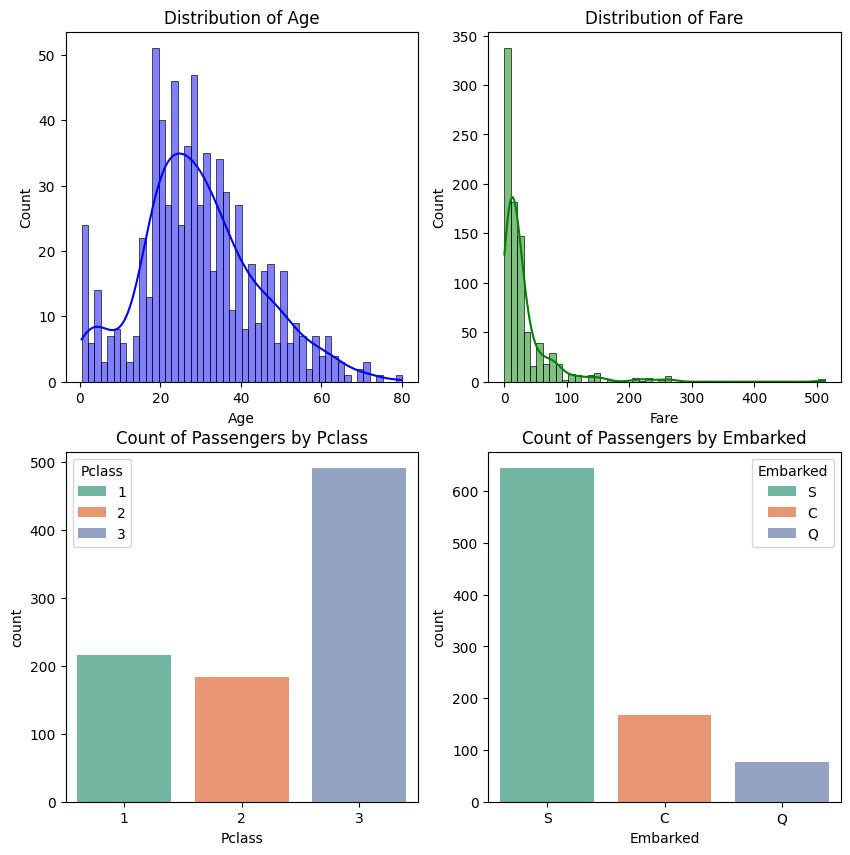

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=df, x='Age', bins=50, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')

sns.histplot(data=df, x='Fare', bins=50, kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Fare')

sns.countplot(data=df, x='Pclass', hue='Pclass', palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Count of Passengers by Pclass')

sns.countplot(data=df, x='Embarked', hue='Embarked', palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Count of Passengers by Embarked')

plt.show()

<Figure size 800x800 with 0 Axes>

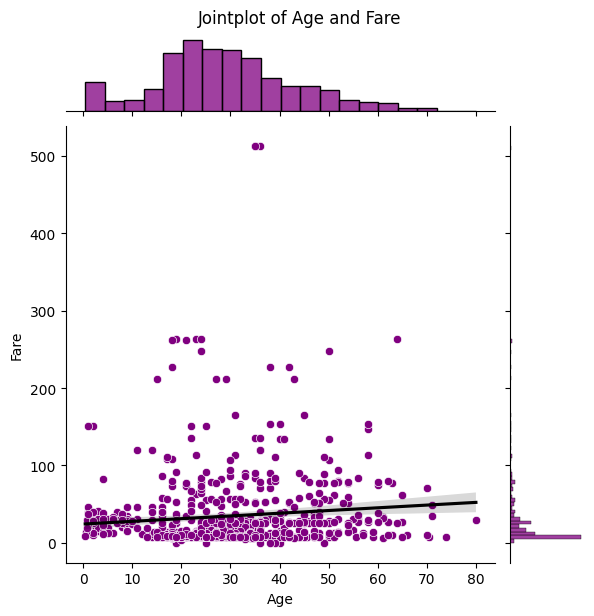

In [26]:
plt.figure(figsize=(8,8))
sns.jointplot(data=df, x='Age', y='Fare', kind='scatter', color='purple')
sns.regplot(data=df, x='Age', y='Fare', scatter=False, color='black')
plt.suptitle('Jointplot of Age and Fare', y=1.02)

plt.show()

<Figure size 800x800 with 0 Axes>

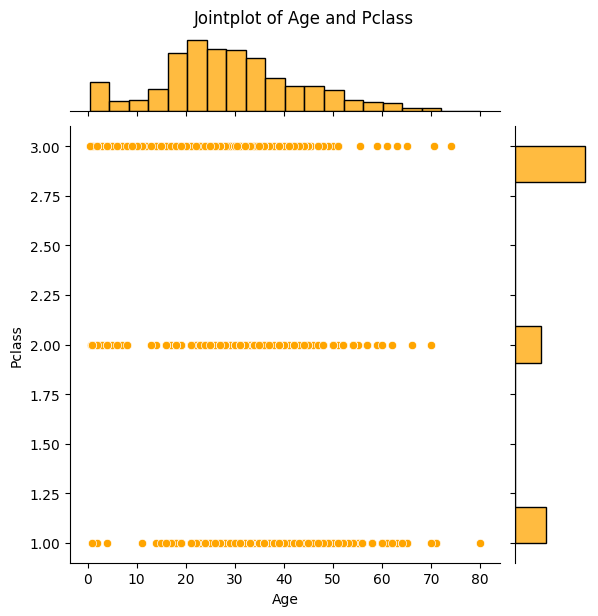

In [27]:
plt.figure(figsize=(8,8))
sns.jointplot(data=df, x='Age', y='Pclass', kind='scatter', color='orange')
plt.suptitle('Jointplot of Age and Pclass', y=1.02)

plt.show()

Sklearn

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [29]:
labelencoder = LabelEncoder()

df['Embarked'] = labelencoder.fit_transform(df['Embarked'])

In [30]:
df[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2


In [31]:
df['Cabin'] = df['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'U')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,U,2
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,U,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C,0


In [32]:
df.drop('Name', axis=1, inplace=True)

df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,U,2
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,U,2
3,4,1,1,1,35.0,1,0,113803,53.1000,C,2
4,5,0,3,0,35.0,0,0,373450,8.0500,U,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,U,2
887,888,1,1,1,19.0,0,0,112053,30.0000,B,2
888,889,0,3,1,NaN,1,2,W./C. 6607,23.4500,U,2
889,890,1,1,0,26.0,0,0,111369,30.0000,C,0


In [33]:
df.drop('Ticket', axis=1, inplace=True)

In [34]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,7.2500,U,2
1,2,1,1,1,38.0,1,0,71.2833,C,0
2,3,1,3,1,26.0,0,0,7.9250,U,2
3,4,1,1,1,35.0,1,0,53.1000,C,2
4,5,0,3,0,35.0,0,0,8.0500,U,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,U,2
887,888,1,1,1,19.0,0,0,30.0000,B,2
888,889,0,3,1,NaN,1,2,23.4500,U,2
889,890,1,1,0,26.0,0,0,30.0000,C,0


In [35]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [36]:
len(set(df['Age']))

265

In [37]:
random_ages = np.random.randint(1, 100, size=df['Age'].isna().sum())
df.loc[df['Age'].isna(), 'Age'] = random_ages

df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,7.2500,U,2
1,2,1,1,1,38.0,1,0,71.2833,C,0
2,3,1,3,1,26.0,0,0,7.9250,U,2
3,4,1,1,1,35.0,1,0,53.1000,C,2
4,5,0,3,0,35.0,0,0,8.0500,U,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,U,2
887,888,1,1,1,19.0,0,0,30.0000,B,2
888,889,0,3,1,69.0,1,2,23.4500,U,2
889,890,1,1,0,26.0,0,0,30.0000,C,0


In [38]:
df['Age'] = df['Age'].astype(int)

In [39]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,22,1,0,7.2500,U,2
1,2,1,1,1,38,1,0,71.2833,C,0
2,3,1,3,1,26,0,0,7.9250,U,2
3,4,1,1,1,35,1,0,53.1000,C,2
4,5,0,3,0,35,0,0,8.0500,U,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,13.0000,U,2
887,888,1,1,1,19,0,0,30.0000,B,2
888,889,0,3,1,69,1,2,23.4500,U,2
889,890,1,1,0,26,0,0,30.0000,C,0


In [40]:
df['Cabin'] = labelencoder.fit_transform(df['Cabin'])

df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,22,1,0,7.2500,8,2
1,2,1,1,1,38,1,0,71.2833,2,0
2,3,1,3,1,26,0,0,7.9250,8,2
3,4,1,1,1,35,1,0,53.1000,2,2
4,5,0,3,0,35,0,0,8.0500,8,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,13.0000,8,2
887,888,1,1,1,19,0,0,30.0000,1,2
888,889,0,3,1,69,1,2,23.4500,8,2
889,890,1,1,0,26,0,0,30.0000,2,0


Sklearn

In [ ]:
y = df['Survived']
X = df

X = df.drop('Survived', axis=1)
X.shape, y.shape

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 9), (179, 9), (712,), (179,))

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


LogisticRegression

In [48]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [50]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



LogisticRegression with regularization

In [51]:
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



In [56]:
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [61]:
model = SVC()

model.fit(X_train, y_train)

SVC()

In [63]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [64]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

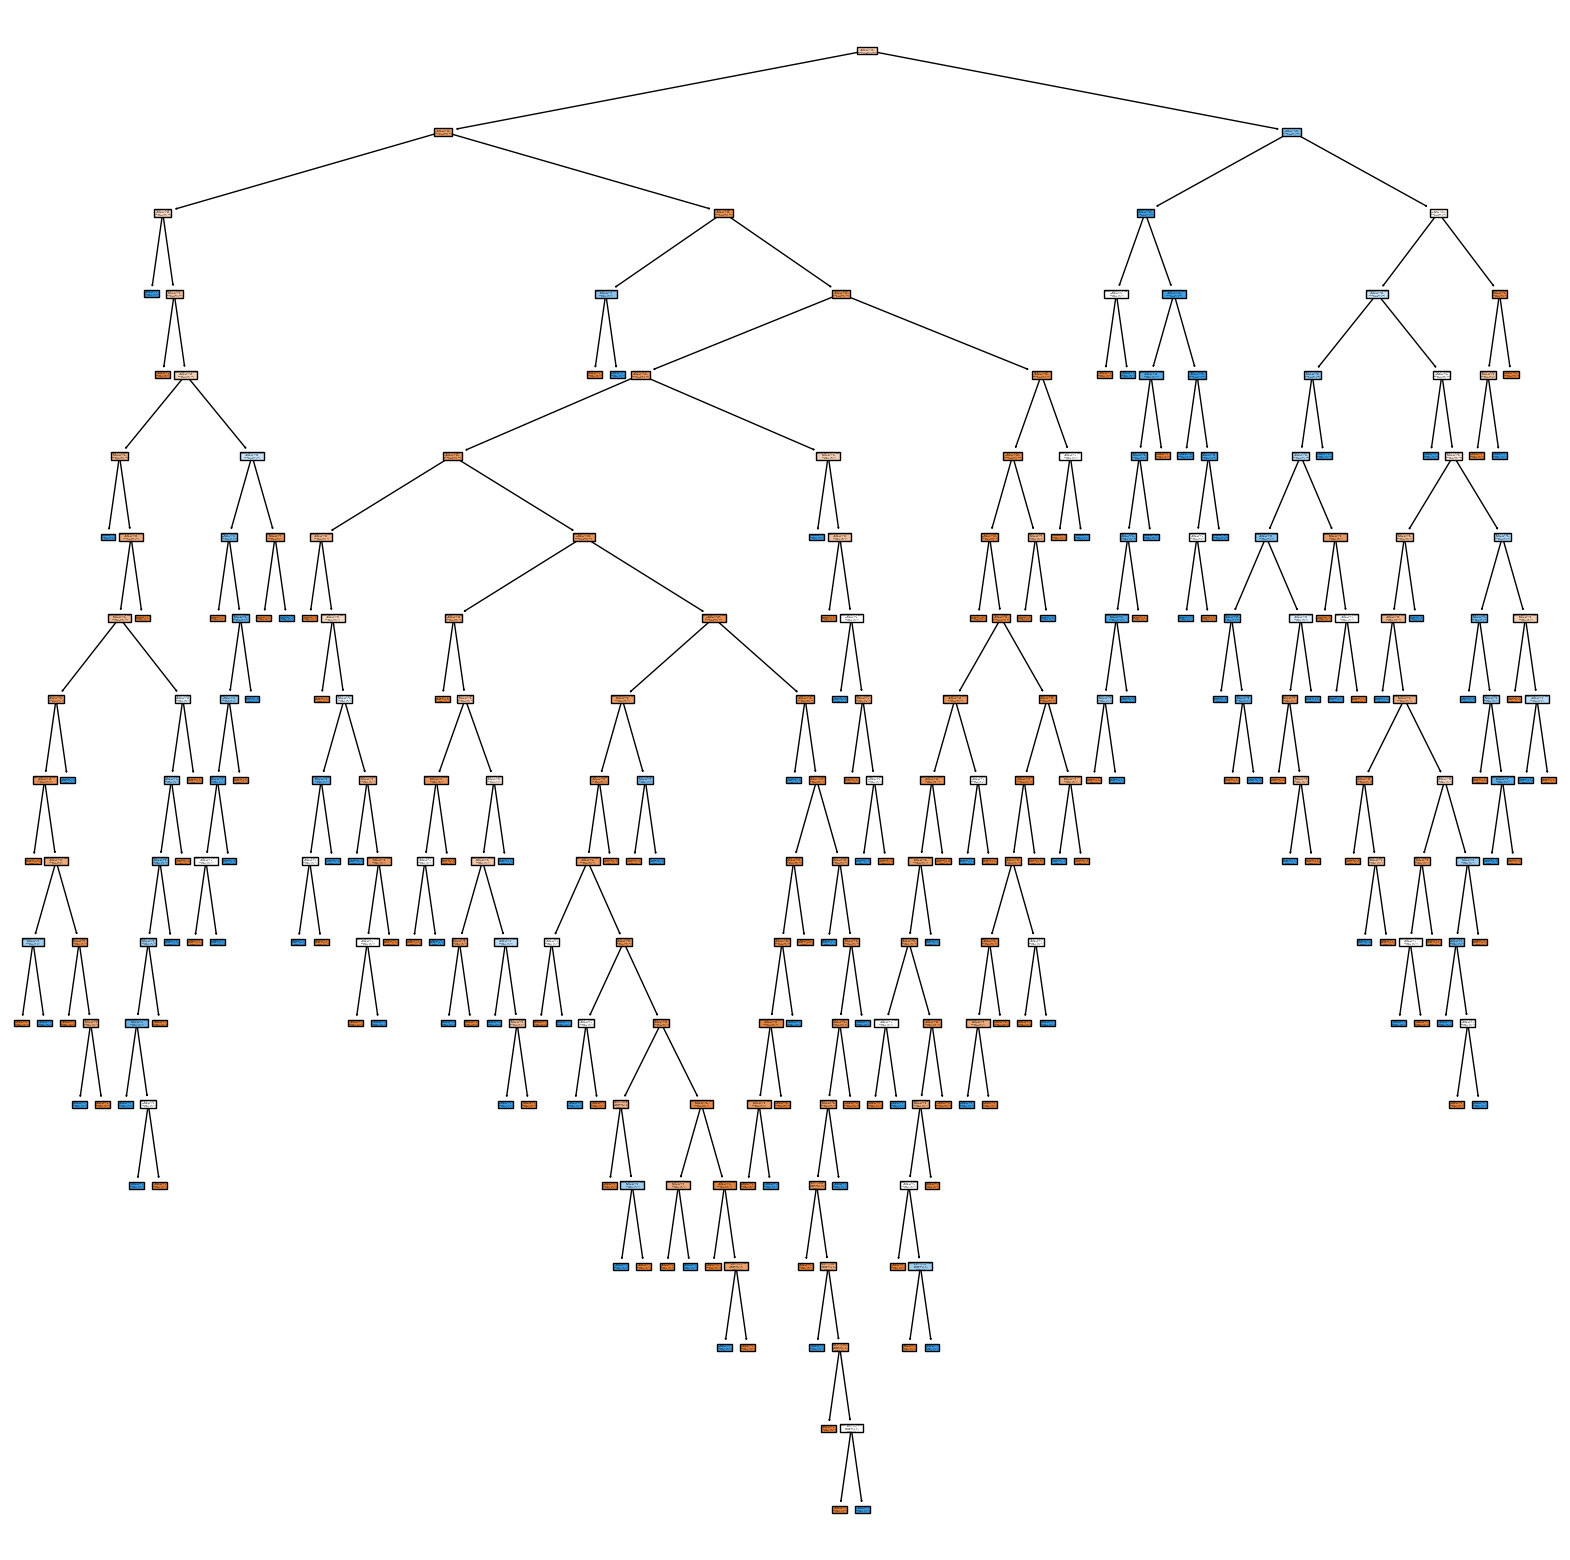

In [68]:
plt.figure(figsize=(20,20))
plot_tree(model, feature_names=X.columns, class_names=['0', '1'], filled=True)

plt.show()

In [69]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76       105
           1       0.66      0.66      0.66        74

    accuracy                           0.72       179
   macro avg       0.71      0.71      0.71       179
weighted avg       0.72      0.72      0.72       179



In [70]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [73]:
model = GradientBoostingClassifier()

model.fit(X_train, y_train)

GradientBoostingClassifier()

In [74]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [75]:
model = AdaBoostClassifier()

model.fit(X_train, y_train)

AdaBoostClassifier()

In [76]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       105
           1       0.76      0.78      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.81      0.81       179



In [77]:
model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

In [78]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



NN

In [89]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 9), (179, 9), (712, 2), (179, 2))

In [92]:
model = Sequential([
    Input(X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

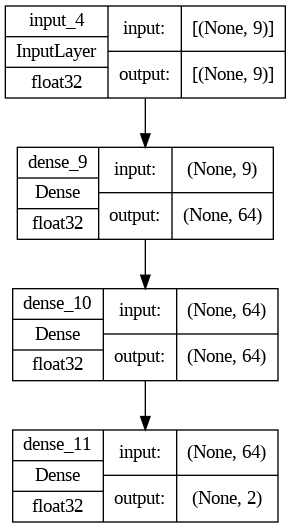

In [93]:
plot_model(model, show_layer_names=True, show_shapes=True, show_dtype=True)

In [94]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [95]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
23/23 [==============================] - 2s 4ms/step - loss: 0.6228 - accuracy: 0.6601
Epoch 2/50
23/23 [==============================] - 0s 5ms/step - loss: 0.4935 - accuracy: 0.7767
Epoch 3/50
23/23 [==============================] - 0s 4ms/step - loss: 0.4563 - accuracy: 0.7893
Epoch 4/50
23/23 [==============================] - 0s 5ms/step - loss: 0.4370 - accuracy: 0.8202
Epoch 5/50
23/23 [==============================] - 0s 7ms/step - loss: 0.4246 - accuracy: 0.8174
Epoch 6/50
23/23 [==============================] - 0s 6ms/step - loss: 0.4166 - accuracy: 0.8202
Epoch 7/50
23/23 [==============================] - 0s 9ms/step - loss: 0.4070 - accuracy: 0.8287
Epoch 8/50
23/23 [==============================] - 0s 8ms/step - loss: 0.4009 - accuracy: 0.8287
Epoch 9/50
23/23 [==============================] - 0s 5ms/step - loss: 0.4006 - accuracy: 0.8230
Epoch 10/50
23/23 [==============================] - 0s 3ms/step - loss: 0.3929 - accuracy: 0.8357
Epoch 11/50
23/23 [

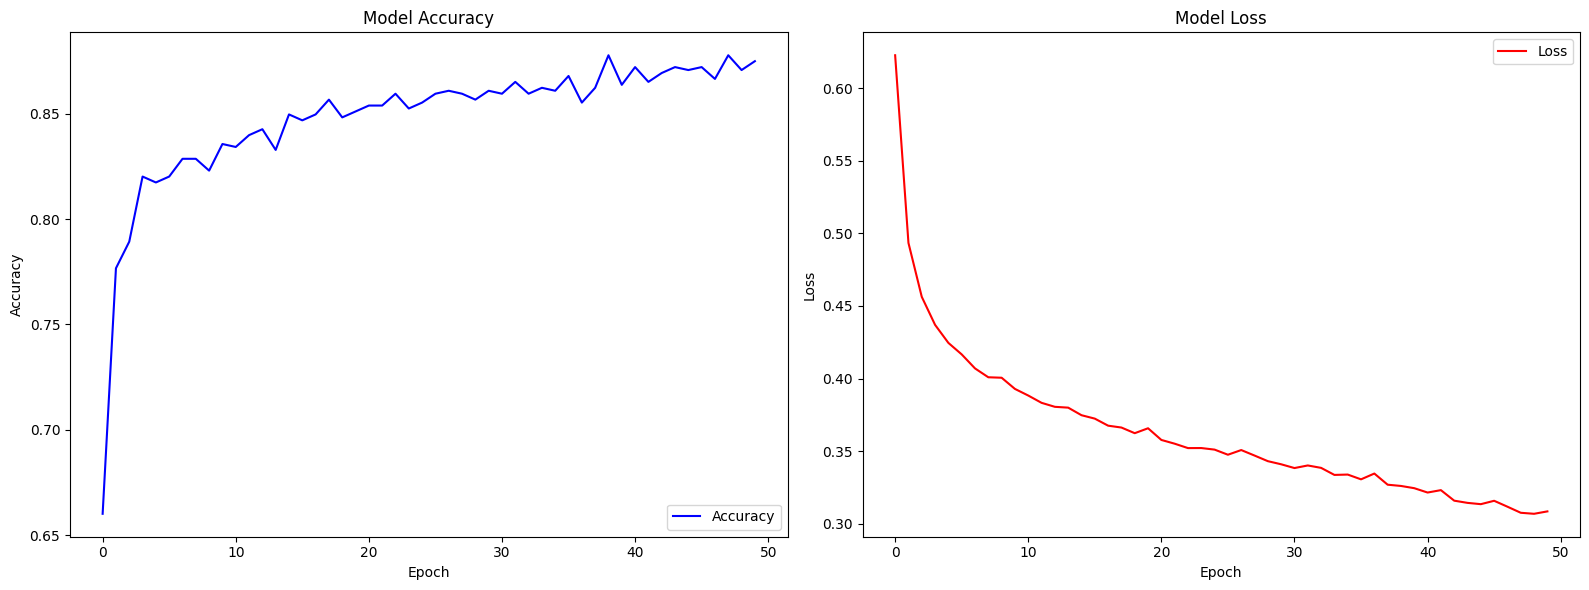

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(history.history['accuracy'], label='Accuracy', color='blue')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='lower right')

axes[1].plot(history.history['loss'], label='Loss', color='red')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

In [96]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.4643 - accuracy: 0.8380


[0.4642755091190338, 0.8379888534545898]